## Author: Jeffrey Fernandez

# Context 
* Company changed CTO in 2021
* CTO recommended switching the software used for tracking sales to a different brand/version
* The new software was deployed and into production in January 2023
* CTO claims that the new software has improved the overall procedures and in consequencevthe overall company sales and profits (CFO might be very happy, but she is not)
* Chief Operative Officer (COO) states that the success in sales and profit for Technology products in 2023 is due to the implementation of a new e-marketing strategy applied from April the 1st till July the 1st.
* CEO and VP are not sure why CFO is not happy when figures look right and asks you the following 3 questions:

    * Q1 “The introduction of new systems in2023 has improved our sales and profits significantly” 
    * Q2 “2023 e-marketing campaign has boosted Technology sales and profits overall other categories” 
    * Q3 “Office supplies are our most profitable product category

## Loading In the Data & Libraries

In [515]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Reading the CSV file Method 1 for Dates (note for x data is european so decimal is comma)
x = pd.read_csv('acme_2021_2022.csv', parse_dates = ['Order Date', 'Ship Date'], dayfirst = False, decimal = ',')
y = pd.read_json('acme_2023_2024.json', convert_dates = ['Order Date', 'Ship Date'])


# Adding an additional column to our data set for the order date year and month
x['Year'] = pd.DatetimeIndex(x['Order Date']).year 
y['Year'] = pd.DatetimeIndex(y['Order Date']).year

x['Month'] = pd.DatetimeIndex(x['Order Date']).month 
y['Month'] = pd.DatetimeIndex(y['Order Date']).month



## Synopsis of variables:

* **Order ID:** A unique identifier for each order.
* **Order Date:** The date when the order was placed.
* **Ship Date:** The date when the order was shipped.
* **Ship Mode:** The shipping method used (e.g., Standard Class).
* **Customer ID:** A unique identifier for each customer.
* **Customer Name:** The name of the customer
* **Segment:** The segment category of the customer (e.g., Consumer, Corporate).
* **Country:** The country where the order was placed.
* **City:** The city where the customer is located.
* **State:** The state where the customer is located.
* **Postal Code:** The postal code for the customer's location.
* **Region:** The region associated with the customer's location.
* **Product ID:** A unique identifier for the product.
* **Category:** The product category.
* **Sub-Category:** A more specific sub-category of the product.
* **Product Name:** The name of the product.
* **Sales:** The sales amount for the order.
* **Quantity:** The quantity of the product ordered.
* **Discount:** The discount applied to the order.
* **Profit:** The profit earned from the order.


As we are looking to directly compare data present within both of these data sets, it would be wise to combine the data set into one large data frame to produce wholistic visualizations with information from both datasets. Before doing so, we must verify that the columns and data types within each column are conistent. 

In [516]:
print(x.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4084 entries, 0 to 4083
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       4084 non-null   object        
 1   Order Date     4084 non-null   datetime64[ns]
 2   Ship Date      4084 non-null   datetime64[ns]
 3   Ship Mode      4084 non-null   object        
 4   Customer ID    4084 non-null   object        
 5   Customer Name  4084 non-null   object        
 6   Segment        4084 non-null   object        
 7   Country        4084 non-null   object        
 8   City           4084 non-null   object        
 9   State          4084 non-null   object        
 10  Postal Code    4084 non-null   int64         
 11  Region         4084 non-null   int64         
 12  Product ID     4084 non-null   object        
 13  Category       4084 non-null   object        
 14  Sub-Category   4084 non-null   object        
 15  Product Name   4084 n

Now that we have both data sets matching lets move on and combine them under 1 dataframe

In [517]:
#total info 
df_total = pd.concat([x,y], ignore_index = True)



# Question 1: Verifying whether “The introduction of new systems in 2023 has improved our sales and profits significantly.” 

With our data sets loaded, we can use our Python Program to retrieve some valueable metrics (such as averages, maximums, and minimums) from each of the data sets.

In [518]:
x.describe()

,Postal Code,Region,Sales,Quantity,Discount,Profit,Year,Month
count,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000
mean,54803.004652,1.521058,264.292752,3.797992,0.156795,33.396192,2021.515426,7.887120
std,32054.651570,1.206683,686.689294,2.240190,0.207308,234.057220,0.499823,3.278298
min,1040.000000,0.000000,0.890000,1.000000,0.000000,-3787.040000,2021.000000,1.000000
25%,22204.000000,0.000000,18.970000,2.000000,0.000000,2.010000,2021.000000,5.000000
50%,55407.000000,1.000000,62.785000,3.000000,0.200000,10.160000,2022.000000,9.000000
75%,90004.000000,3.000000,249.667500,5.000000,0.200000,37.960000,2022.000000,11.000000
max,99301.000000,3.000000,23702.490000,14.000000,0.800000,4736.980000,2022.000000,12.000000


In [519]:
y.describe()

,Postal Code,Region,Sales,Quantity,Discount,Profit,Year,Month
count,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000
mean,55479.684597,1.512085,368.803825,3.781043,0.155915,63.088597,2023.388152,6.545498
std,31932.498610,1.204635,1189.961510,2.193079,0.206966,1502.673596,0.487387,3.265754
min,1752.000000,0.000000,0.000000,1.000000,0.000000,-6619.780000,2023.000000,1.000000
25%,24031.250000,0.000000,27.442500,2.000000,0.000000,1.847500,2023.000000,4.000000
50%,58754.000000,1.000000,84.150000,3.000000,0.200000,8.860000,2023.000000,6.000000
75%,90032.000000,3.000000,328.765000,5.000000,0.200000,29.660000,2024.000000,9.000000
max,99207.000000,3.000000,43507.200000,14.000000,0.800000,91585.940000,2024.000000,12.000000


With these metrics, we can see our first dataset contains metrics from the years 2021-2022 and our second dataset jolding metrics from 2023-2024. We are also given the average of sales and profits in each of the datasets. 

We can easily make a quick visualization of the average sales and profit by each year, allowing us to easily compare the years side by side

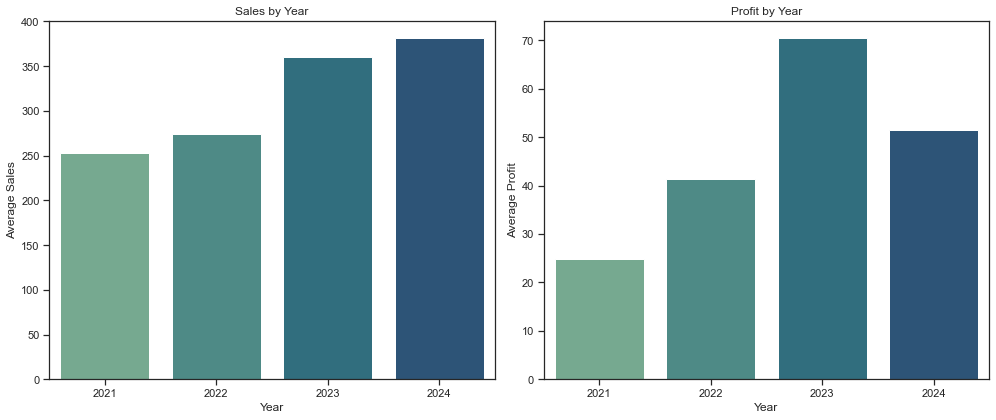

In [583]:
fig, axes = plt.subplots(1,2, figsize = (14,6))

sns.barplot(x = average_sales_by_year.index, y = average_sales_by_year.values, palette = 'crest', ax=axes[0])
axes[0].set_title('Sales by Year')
axes[0].set_xlabel('Year')  
axes[0].set_ylabel('Average Sales')  

sns.barplot(x = average_profit_by_year.index, y = average_profit_by_year.values, palette = 'crest', ax=axes[1])
axes[1].set_title('Profit by Year')
axes[1].set_xlabel('Year')  
axes[1].set_ylabel('Average Profit')

plt.tight_layout()
plt.show()

Viewing these 2 graphs and the numerical metrics from earlier it may seem easy to assume there to be an obvious improvment from the 21/22 sales data to the 23/24 sales data. We can see an immidiate jump in average profit and sales from 2022 and 2023, but we are overlooking something. 

Looking back at our descriptive analytics, we can see a pretty large difference from the 50th percentile to the maximum of each dataset, especially in dataset 23/24 where the **maximum is almost 500 times larger than the median**, accompanied by a very large standard deviation. This can lead us to believe that there are some notable outliers present in our dataset skewing our averages. 

To assess this, we will look at the entire datas spread through the form of a box plot. 

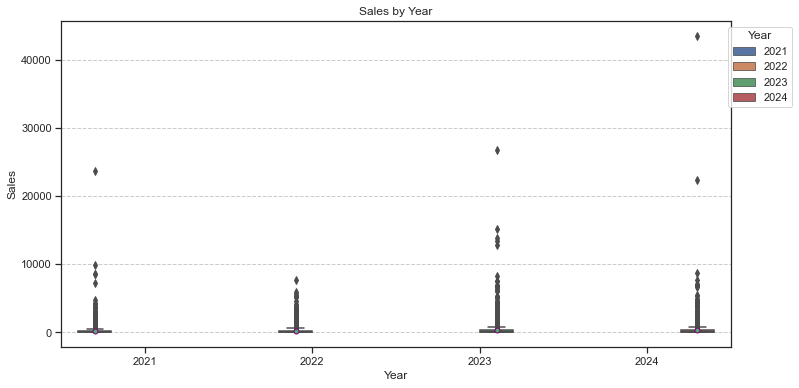

In [522]:
plt.figure(figsize = (12,6))
sns.boxplot(x = "Year", y = "Sales", data = df_total, hue = "Year", palette = "deep",
            showmeans = True, meanprops = {'marker': '.', "markeredgecolor": 'purple', 'markersize': "10"})


#Customization of Chart

plt.title('Sales by Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid(axis = 'y', linestyle = '--')
plt.legend(title = 'Year',bbox_to_anchor = (1.10,1), loc = 'upper right')

plt.show()

This graph shows us significant evidence of there being multiple outliers in our data in the form of dots present in our box plot. To better understand the spread of both of our sales, lets create a frequency histogram with some constaraints. 

Sales and Profits are both extremely volitile so we will find the upper and lower limit of 2 standard Deviations for 95% of the data and work with it from there.

In [523]:
def find_anomalies(data):
    anomalies = []
    
    data_std = np.std(data)
    data_mean = np.mean(data)
    anomaly_cut_off = data_std * 2
    
    lower_limit = data_mean - anomaly_cut_off
    upper_limit = data_mean + anomaly_cut_off
    print('Upper Limit: ',upper_limit)
    print('Lower Limit: ',lower_limit)

find_anomalies(df_total['Sales'])
find_anomalies(df_total['Profit'])

Upper Limit:  2270.8748285086735
Lower Limit:  -1636.066605965321
Upper Limit:  2215.8703067882325
Lower Limit:  -2118.8992253816814


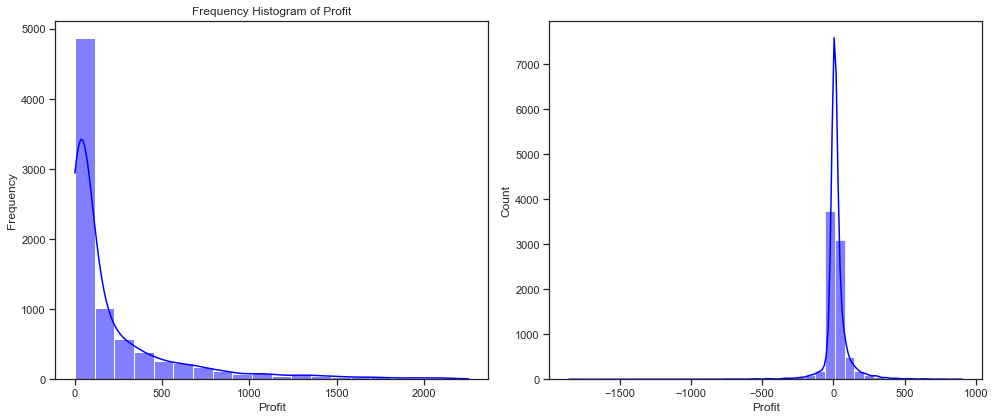

In [585]:
#newly filtered data set to subtract calculate anomalies
df_filt = df_total[(df_total['Sales'] <= 2270)&(df_total['Sales'] >= -1636)
                  & (df_total['Profit'] <= 2215)&(df_total['Profit'] >= -2118)]


fig, axes = plt.subplots(1,2, figsize = (14,6))
sns.histplot(data = df_filt, x = 'Sales', bins = 20, kde = True, color = 'blue',  ax=axes[0])
axes[0].set_title('Frequency Histogram of Sales')
axes[0].set_xlabel('Sales')  
axes[0].set_ylabel('Frequency')

sns.histplot(data = df_filt, x = 'Profit', bins = 40, kde = True, color = 'blue', ax=axes[1])
axes[0].set_title('Frequency Histogram of Profit')
axes[0].set_xlabel('Profit')  
axes[0].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Our frequency histograms above give us a stronger idea of where the majority of the data is, we will adjust our margins as such:
* Sales less than 1250
* Profit more than -150 and less than 150

We can check that these constraits are proper ones by looking at our cumulative distribution function to see if they cover a reasonable amount of out data still:

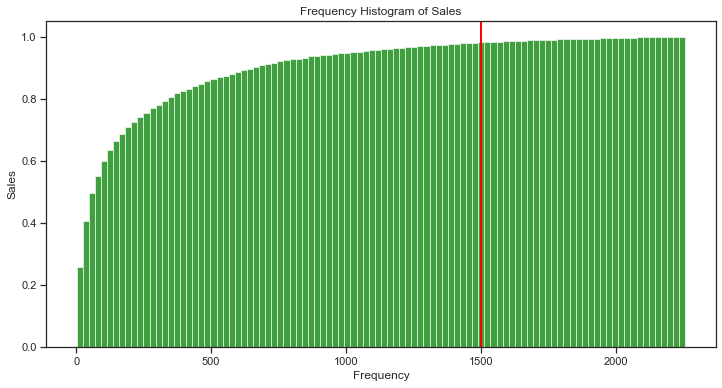

In [526]:
plt.figure(figsize = (12,6))
sns.histplot(data = df_filt, x = 'Sales', bins = 100,  color = 'green', cumulative = True, stat = 'density')

plt.axvline(x=1500, color='red', linestyle='-', linewidth=2, label='Reference Line')
plt.title('Frequency Histogram of Sales')
plt.xlabel('Frequency')
plt.ylabel('Sales')

plt.show()

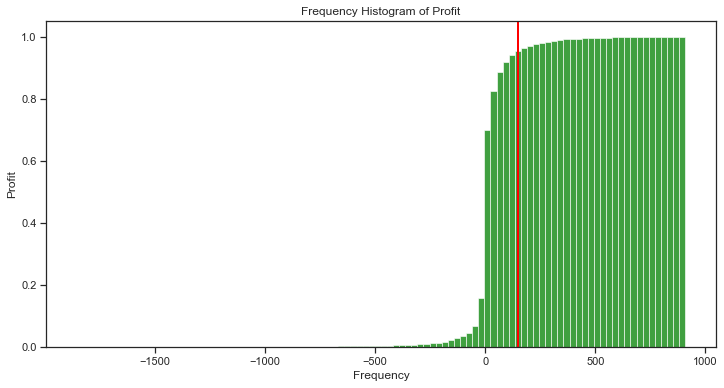

In [527]:
plt.figure(figsize = (12,6))
sns.histplot(data = df_filt, x = 'Profit', bins = 100,  color = 'green', cumulative = True, stat = 'density')

plt.axvline(x=150, color='red', linestyle='-', linewidth=2, label='Reference Line')
plt.title('Frequency Histogram of Profit')
plt.xlabel('Frequency')
plt.ylabel('Profit')

plt.show()

In [2]:
cols_for_pairplot = ['Sales', 'Profit', "Year"]
df_pairplot = df_clean[cols_for_pairplot]


sns.pairplot(df_pairplot, vars = df_pairplot.columns[:-1], hue = "Year",  height = 3, palette = "deep")

plt.show()

NameError: name 'df_clean' is not defined

As seen, these constrainst still provide us with over 95% of the data we want to work with while eliminating some estreme outliers. Our pairplot also shows the coverage of each of these variables with these new constraints. Hence, we will be moving forward in our analysis with these constraints. 

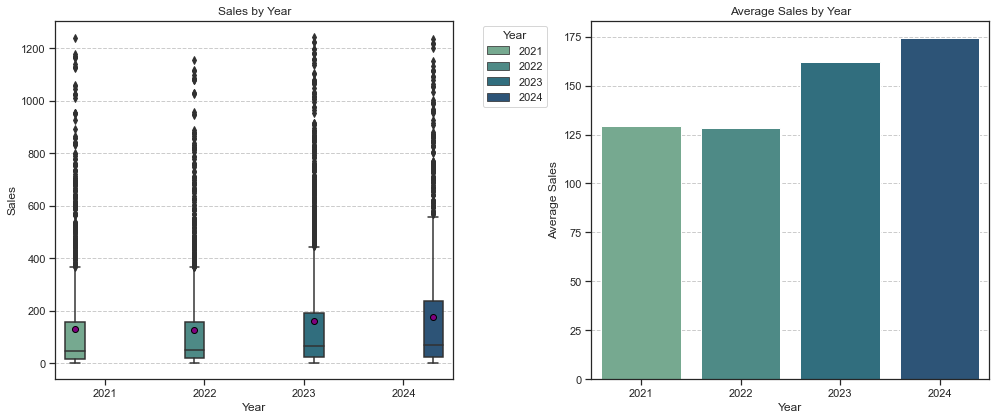

In [588]:
df_clean = df_filt[(df_filt['Sales'] <= 1250)
                  & (df_filt['Profit'] <= 150)&(df_filt['Profit'] >= -150)]
#adding additional column of profit margins to be used later
df_clean['Profit Margin'] = (df_clean['Profit']/df_clean['Sales']).round(2)


#graphing boxplot
fig, axes = plt.subplots(1,2, figsize = (14,6))
sns.boxplot(x = "Year", y = "Sales", data = df_clean, hue = "Year", palette = "crest", 
            showmeans = True, meanprops = {'marker': '.', 'markerfacecolor': 'purple', "markeredgecolor": 'black', 'markersize': '12'},
           ax=axes[0])

axes[0].set_title('Sales by Year')  
axes[0].set_xlabel('Year')          
axes[0].set_ylabel('Sales')          
axes[0].grid(axis='y', linestyle='--')  
axes[0].legend(title='Year', bbox_to_anchor=(1.25, 1), loc='upper right')



#graphing barplot
average_sales_clean = df_clean.groupby('Year')['Sales'].mean().sort_values()


sns.barplot(x = average_sales_clean.index, y = average_sales_clean.values, palette = 'crest', ax=axes[1])

axes[1].set_title('Average Sales by Year')  
axes[1].set_xlabel('Year')          
axes[1].set_ylabel('Average Sales')          
axes[1].grid(axis='y', linestyle='--')  

plt.tight_layout()
plt.show()


We can also take a look at total sales

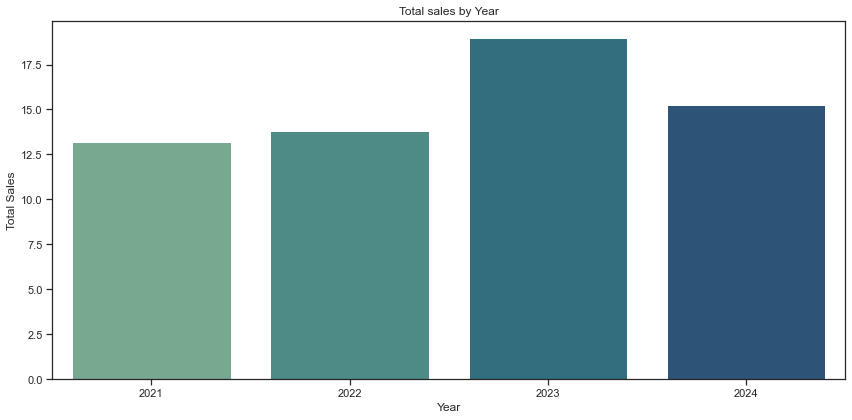

In [598]:
#graphing barplot
total_sales_clean = df_clean.groupby('Year')['Sales'].sum().sort_values()

plt.figure(figsize = (12,6))
sns.barplot(x = total_sales_clean.index, y = average_sales_clean.values, palette = 'crest')

plt.title('Total sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales') 

plt.tight_layout()
plt.show()

In both graphs, we can see an apparent increase in sales from 21/22 to 23/24, but let us analyze profit.

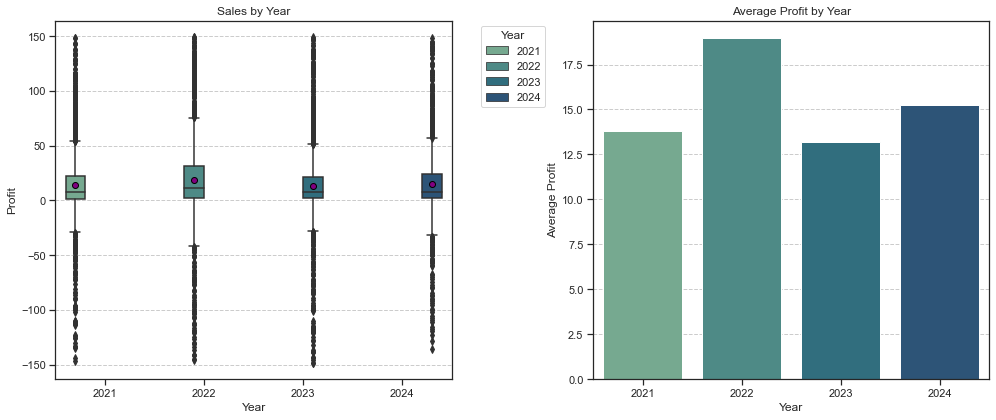

In [589]:

#graphing boxplot
fig, axes = plt.subplots(1,2, figsize = (14,6))
sns.boxplot(x = "Year", y = "Profit", data = df_clean, hue = "Year", palette = "crest", 
            showmeans = True, meanprops = {'marker': '.', 'markerfacecolor': 'purple', "markeredgecolor": 'black', 'markersize': '12'},
           ax=axes[0])

axes[0].set_title('Profit by Year')  
axes[0].set_xlabel('Year')          
axes[0].set_ylabel('Profit')          
axes[0].grid(axis='y', linestyle='--')  
axes[0].legend(title='Year', bbox_to_anchor=(1.25, 1), loc='upper right')



#graphing barplot
average_sales_clean = df_clean.groupby('Year')['Profit'].mean().sort_values()


sns.barplot(x = average_sales_clean.index, y = average_sales_clean.values, palette = 'crest', ax=axes[1])

axes[1].set_title('Average Profit by Year')  
axes[1].set_xlabel('Year')          
axes[1].set_ylabel('Average Profit')          
axes[1].grid(axis='y', linestyle='--')  

plt.tight_layout()
plt.show()

We can observe with our newly cleaned data, that there is indeed an increase in sales from 21/22 to 23/24, but not as dramatic as we initially believed it to be. As for profit, we can see a noticible decline in them from the two sections. How is that? It is likely due to simply an increase in the number of sales made, but not as relatively high profit per sale. Things like an increase in discount per sale could affect this. 

# Question 2: “2023 e-marketing campaign has boosted Technology sales and profits overall in other categories”

We will first filter out our dataset to only contain data from the Technology category

In [532]:
df_clean_tech = df_clean[(df_clean['Category'] == 'Technology')]

df_clean_tech.groupby('Year')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2021,292.0,234.544726,240.088652,2.07,61.0800,157.00,314.7075,1165.84
2022,315.0,208.195206,197.832702,2.90,59.7700,138.49,295.6950,1097.94
2023,368.0,268.591386,249.792132,3.03,87.4925,174.21,392.4225,1243.49
2024,260.0,311.087885,282.157637,2.53,95.9650,199.67,436.3175,1203.17


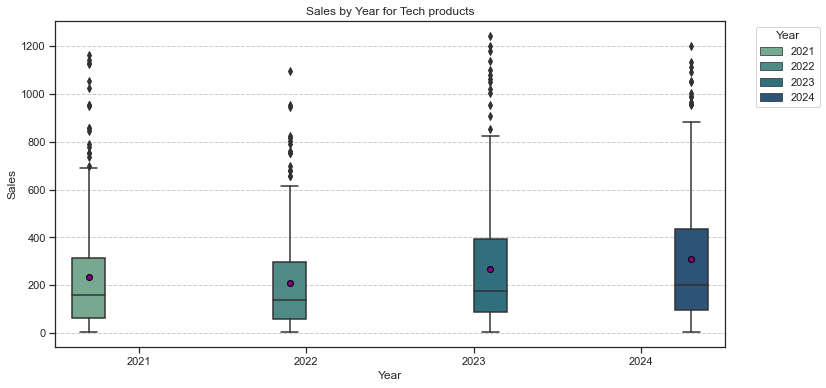

In [533]:
plt.figure(figsize = (12,6))
sns.boxplot(x = "Year", y = "Sales", data = df_clean_tech, hue = "Year", palette = "crest",
           showmeans = True, meanprops = {'marker': '.', 'markerfacecolor': 'purple', "markeredgecolor": 'black', 'markersize': '12'})

plt.title('Sales by Year for Tech products')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid(axis = 'y', linestyle = '--')
plt.legend(title = 'Year', bbox_to_anchor = (1.15,1), loc = 'upper right')

plt.show()


As can be analyzed from our box plot, there is indeed a noticable increase in our averages (the dots) from 21/22 to 23/24 and even a slight increase in the median for sales. 

Lets see if there is a relation between profits.

In [534]:
sales_by_cat_year = df_clean.groupby(['Year','Category'])['Profit']
sales_by_cat_year.describe()

count       mean        std     min      25%     50%  \
Year Category                                                                 
2021 Furniture         359.0   5.338106  46.707390 -146.55 -10.7300   6.520   
     Office Supplies  1156.0  11.770363  26.375749 -134.14   2.0375   6.555   
     Technology        292.0  32.247500  43.309766 -124.06   5.2575  23.060   
2022 Furniture         368.0  15.106359  53.515622 -145.40  -6.9875  13.920   
     Office Supplies  1154.0  16.477764  33.734605 -141.29   2.7000   9.325   
     Technology        315.0  32.689968  45.118773 -141.11   4.4800  25.200   
2023 Furniture         461.0   6.348807  45.955057 -148.41  -8.1200   7.610   
     Office Supplies  1480.0  12.941547  27.506042 -145.79   2.3875   6.780   
     Technology        368.0  22.843750  41.195078 -124.37   3.3500  15.350   
2024 Furniture         283.0   6.331095  42.394736 -128.16  -7.8650   7.520   
     Office Supplies   945.0  14.037090  29.615344 -111.20   1.8900   6.660   
     Technology        260.0  29.489923  42.529209 -135.45   7.1900  18.590   

                          75%     max  
Year Category                          
2021 Furniture        23.3550  148.62  
     Office Supplies  15.9100  132.35  
     Technology       58.0100  143.21  
2022 Furniture        40.8000  149.16  
     Office Supplies  23.5000  147.90  
     Technology       58.2650  148.16  
2023 Furniture        24.2700  146.84  
     Office Supplies  17.3925  148.96  
     Technology       38.4275  147.21  
2024 Furniture        24.9150  142.57  
     Office Supplies  18.8300  144.81  
     Technology       50.9800  148.30

Numerically, our data actually shows a decline in profit from 21/22 to 23/24 when lookin at both the median and mean profit for all categories. Lets analyze it visually.

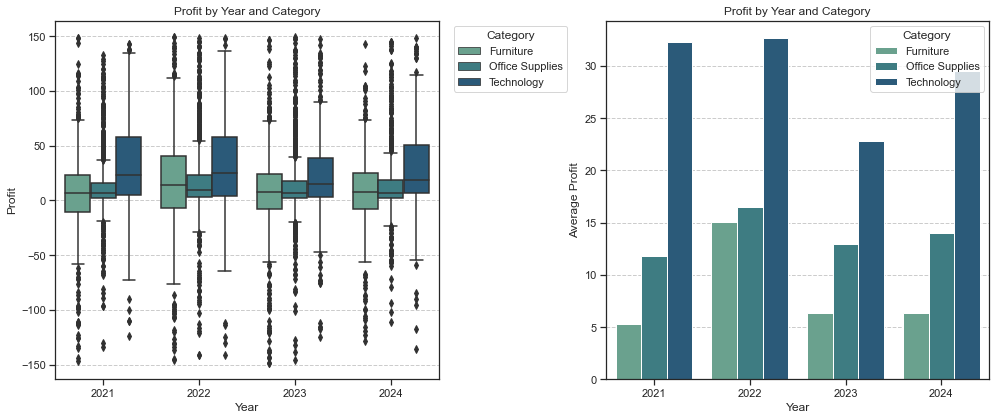

In [596]:
cat_year_graph = sales_by_cat_year.mean().reset_index()

#graphing boxplot
fig, axes = plt.subplots(1,2, figsize = (14,6))
sns.boxplot(x = "Year", y = "Profit", data = df_clean, hue = "Category", palette = "crest",
           ax=axes[0])

axes[0].set_title('Profit by Year and Category')  
axes[0].set_xlabel('Year')          
axes[0].set_ylabel('Profit')          
axes[0].grid(axis='y', linestyle='--')  
axes[0].legend(title='Category', bbox_to_anchor=(1.35, 1), loc='upper right')



#graphing barplot
average_sales_clean = df_clean.groupby('Year')['Profit'].mean().sort_values()


sns.barplot(x = "Year", y = "Profit", data = cat_year_graph, hue = "Category", palette = "crest", ax=axes[1])

axes[1].set_title('Profit by Year and Category')  
axes[1].set_xlabel('Year')          
axes[1].set_ylabel('Average Profit')          
axes[1].grid(axis='y', linestyle='--') 

plt.tight_layout()
plt.show()

Our prior statement of a decrease in all categories profit is supported in our visualizations. Another way to examine this statement is looking at correlations between each category and profit/profit margins. 

Text(0.5, 1.0, 'Correlation of Profit and Categories for 21/22')

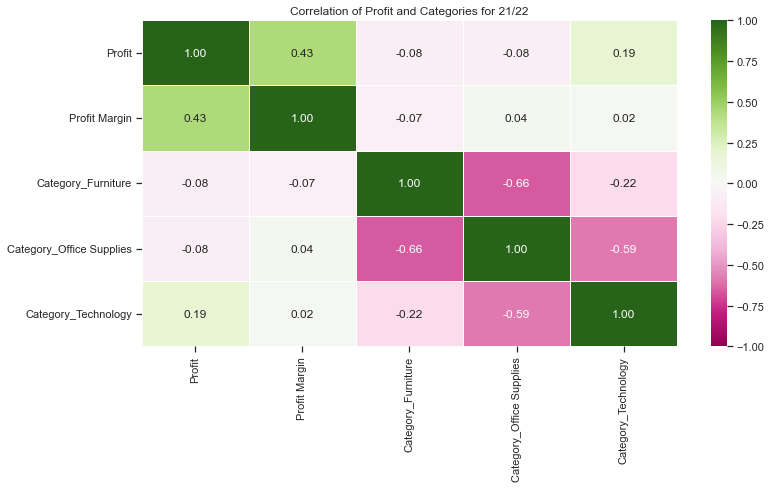

In [537]:
x_clean = x_filt[(x['Sales'] <= 1250)
                  & (x['Profit'] <= 150)&(x['Profit'] >= -150)]

x_clean['Profit Margin'] = (x_clean['Profit']/x_clean['Sales']).round(2)

x_clean_corr = pd.get_dummies(x_clean, columns = ['Category'])


selected_cols = ['Profit', 'Profit Margin',
                 'Category_Furniture', 'Category_Office Supplies', 
                 'Category_Technology']

x_correlation_matrix = x_clean_corr[selected_cols].corr()

plt.figure(figsize = (12,6))
sns.heatmap(x_correlation_matrix, annot = True, linewidth = .5, fmt = ".2f", cmap = "PiYG", vmin = -1, vmax = 1)

plt.title('Correlation of Profit and Categories for 21/22')


In [3]:
y_clean = y[(y['Sales'] <= 1250)
            & (y['Profit'] <= 150)&(y['Profit'] >= -150)]

y_clean['Profit Margin'] = (y_clean['Profit']/y_clean['Sales']).round(2)

y_clean_corr = pd.get_dummies(y_clean, columns = ['Category'])


selected_cols = ['Profit', 'Profit Margin',
                 'Category_Furniture', 'Category_Office Supplies', 
                 'Category_Technology']

y_correlation_matrix = y_clean_corr[selected_cols].corr()

plt.figure(figsize = (12,6))
sns.heatmap(y_correlation_matrix, annot = True, linewidth = .5, fmt = ".2f", cmap = "PiYG", vmin = -1, vmax = 1)

plt.title('Correlation of Profit and Categories for 23/24')

NameError: name 'y' is not defined

Observing the correlations we can see there to also be shown a decrease in profits for technology from the two sections, as previously hypothesized, with only a slight increase in profit correlatin for Office Supplies.

# Question 3: “Office supplies are our most profitable product category"

For deciphering whether a category is more profitable than others, rather than looking at general profit we would want to analyze profit margins. As seen in our correlation matrix above, office supplies does indeed hold the highest correltion with a positive profit margin throughout all years despit not being necessarily the most overall profitted category. Lets dive into some numbers and visualizations.

In [539]:
prof_marg_by_cat_year = df_clean.groupby(['Year','Category'])['Profit Margin']
prof_marg_by_cat_year.describe()

count      mean       std   min     25%    50%   75%  \
Year Category                                                                 
2021 Furniture         359.0  0.050724  0.306687 -1.29 -0.0600  0.100  0.27   
     Office Supplies  1156.0  0.141626  0.519893 -2.64  0.1100  0.320  0.44   
     Technology        292.0  0.154521  0.186719 -0.72  0.0800  0.160  0.28   
2022 Furniture         368.0  0.098370  0.328162 -1.80 -0.0500  0.140  0.32   
     Office Supplies  1154.0  0.167366  0.604719 -3.16  0.1300  0.375  0.53   
     Technology        315.0  0.173429  0.210700 -0.88  0.0850  0.140  0.32   
2023 Furniture         461.0  0.041432  0.208866 -0.90 -0.0400  0.070  0.20   
     Office Supplies  1480.0  0.111068  0.323612 -1.84  0.0800  0.210  0.30   
     Technology        368.0  0.090571  0.131387 -0.52  0.0475  0.090  0.18   
2024 Furniture         283.0  0.041767  0.200974 -0.85 -0.0350  0.080  0.18   
     Office Supplies   945.0  0.079270  0.366561 -1.77  0.0700  0.200  0.29   
     Technology        260.0  0.105692  0.108986 -0.16  0.0575  0.090  0.19   

                       max  
Year Category               
2021 Furniture        0.48  
     Office Supplies  0.49  
     Technology       0.47  
2022 Furniture        0.56  
     Office Supplies  0.57  
     Technology       1.14  
2023 Furniture        0.32  
     Office Supplies  0.57  
     Technology       0.32  
2024 Furniture        0.32  
     Office Supplies  0.32  
     Technology       0.32

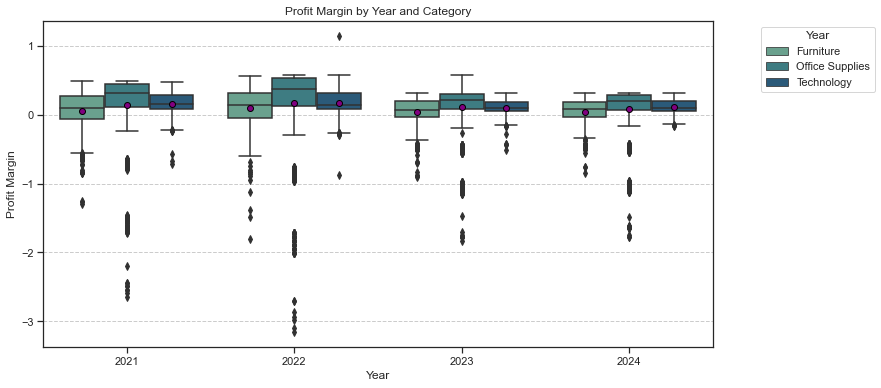

In [540]:
plt.figure(figsize = (12,6))
sns.boxplot(x = "Year", y = "Profit Margin", data = df_clean, hue = "Category", palette = "crest", showmeans = True,
           meanprops = {'marker': '.', 'markerfacecolor': 'purple', "markeredgecolor": 'black', 'markersize': '12'})

plt.title('Profit Margin by Year and Category')
plt.xlabel('Year')
plt.ylabel('Profit Margin')
plt.grid(axis = 'y', linestyle = '--')
plt.legend(title = 'Year', bbox_to_anchor = (1.25,1), loc = 'upper right')

plt.show()



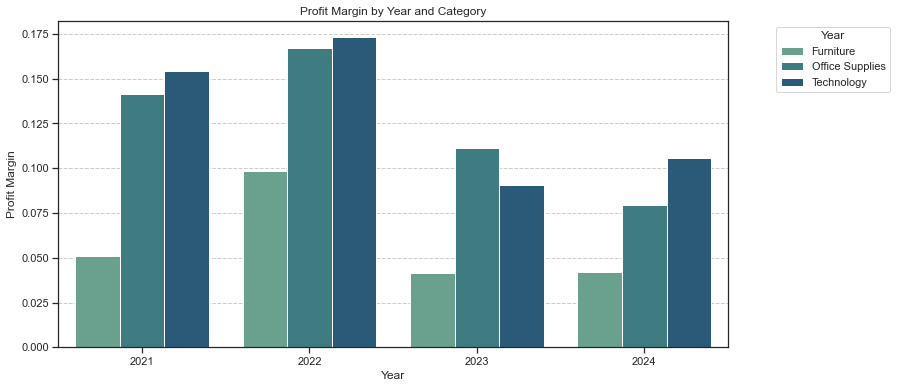

In [541]:
pmbcy_graph = prof_marg_by_cat_year.mean().reset_index()

plt.figure(figsize = (12,6))
sns.barplot(x = "Year", y = "Profit Margin", data = pmbcy_graph, hue = "Category", palette = "crest")

plt.title('Profit Margin by Year and Category')
plt.xlabel('Year')
plt.ylabel('Profit Margin')
plt.grid(axis = 'y', linestyle = '--')
plt.legend(title = 'Year', bbox_to_anchor = (1.25,1), loc = 'upper right')


plt.show()

From what we can observe from our numerical and visual representations, the medians of profit margins do appear to be the highest within office supplies, but some strong outliers bring the average down a substantial amount. All in all, I would agree with the statement that Office supplie are the most Profitable category by profit margin.

# Additional Questions 
For the purpose of accuracy, we will be moving forward and answering these questions with the cleaned data rather than the raw data

## Q1: What were the total sales generated by the company over the course of the 2024 year?

In [542]:
total_2024 = df_clean[df_clean['Year'] == 2024]['Sales'].sum()
print(total_rev_2024)

625177.76


Total sales for 2024 is $625,177.76. My process for this question was to subset the total database of all years of only values with the year = 2024, then sum up all the values in the "Sale" column. 

## Q2: Which product had the highest profit and how much profit did it generate?

In [543]:
highest_profit = df_total.sort_values(by = 'Profit', ascending=False)
highest_profit.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month
4245,2023-166674,2023-03-04,2023-05-04,Second Class,RB-19360,Raymond Cooper,Consumer,United States,Auburn,New York,...,TEC-PH-10002365,Technology,Phones,Belkin Grip Candy Sheer Case / Cover for iPhon...,53.73,4,0.0,91585.94,2023,3
8213,2024-151855,2024-05-28,2024-04-06,Standard Class,BW-11110,Bart Weaver,Corporate,United States,Greensboro,North Carolina,...,TEC-AC-10002380,Technology,Accessories,Sony 64GB Class 10 Micro SDHC R40 Memory Card,43507.20,3,0.2,27980.10,2024,5
5833,2023-118689,2023-04-10,2023-11-10,Standard Class,TC-20980,Tamara Lewis,Corporate,United States,Lafayette,Indiana,...,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,26774.92,5,0.0,8425.18,2023,4


In [544]:
highest_clean = df_clean.sort_values(by = 'Profit', ascending=False)
highest_clean.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Profit Margin
2770,2022-107937,2022-05-04,2022-05-09,Standard Class,JB-16045,Julia Mitchell,Home Office,United States,Chula Vista,California,...,Furniture,Furnishings,"Rubbermaid ClusterMat Chairmats, Mat Size- 66""...",812.37,6,0.0,149.16,2022,5,0.18
2497,2022-113145,2022-11-02,2022-11-06,Standard Class,VD-21670,Valerie Watson,Consumer,United States,New York City,New York,...,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",316.83,5,0.0,149.07,2022,11,0.47
6493,2023-152688,2023-10-19,2023-10-22,First Class,NR-18550,Nick Scott,Consumer,United States,Perth Amboy,New Jersey,...,Office Supplies,Binders,GBC ProClick 150 Presentation Binding System,483.45,1,0.0,148.96,2023,10,0.31


The Product with the highest profit was the TEC-PH-10002365, with a singular profit of 91,585.94, from a phone case. The profit is higher than even the sale value, likely a sign of some sort of error in our dataset. Looking at the top 3 most profitable orders, the second to come is TEC-AC-10002380, a sony memory card with 43,507.20 in profit.

For the clean data,highest profit was a mattress that delivered a profit of $149.16. Will be said that it is possible that the raw data contains an accurate answer despite it being an outlier. 

The way I did this was sorting the entire data set by Profit descending, then indexed the first 3 items in this ordered data frame and retrieved the metrics. 

## Q3: What was the average price of all products sold by the company?

To answer this question we will use the median of our uncleaned data and the mean of our cleaned data.

In [510]:
df_clean['Price'] = (df_clean['Sales']/df_clean['Quantity']).round(2)
average_price_clean = df_clean['Price'].mean()
average_price_clean

47.84294987232886

Average price was $47.84. Did this by creating a new column called price dividing sales by quantity, then finding the mean of that column.

## Q4: What was the total quantity of products sold by the company?

In [546]:
total_quant = df_clean['Quantity'].sum()
total_quant

26939

Total quantity of products sold was 26939. Did this by simply summing up all the quantities present in the quantity column. 

## Q5 Which category had the highest revenue and how much revenue did it generate?

In [547]:
tot_sales_cat = df_clean.groupby('Category')['Sales'].sum()
tot_sales_cat

Category
Furniture          387282.51
Office Supplies    402598.36
Technology         313793.03
Name: Sales, dtype: float64

Category with the highest revenue was office supplies at $402,598. Did this by grouping the data by each category then summing up their Sales

## Q6 What was the average revenue per sale?

In [335]:
avg_rev_perSale = df_clean['Sales'].mean()
avg_rev_perSale

136.8952402297238

Average Revenue from Sales was $136.89. Did this by simply finding the average of the "Sale Column"

## Q7 What was the total revenue generated in each quarter of the year?

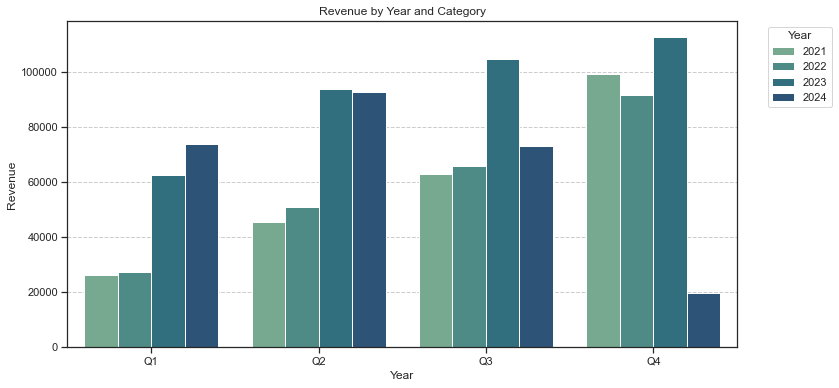

In [548]:
def quarter(x):
    if x in [1, 2, 3]:
        return 'Q1'
    elif x in [4, 5, 6]:
        return 'Q2'
    elif x in [7, 8, 9]:
        return 'Q3'
    elif x in [10, 11, 12]:
        return 'Q4'

# Apply the function to create a new 'Quarter' column
df_clean['Quarter'] = df_clean['Month'].apply(quarter)

year_quarter = df_clean.groupby(['Year', 'Quarter'])['Sales'].sum().reset_index()

plt.figure(figsize = (12,6))
sns.barplot(x = "Quarter", y = "Sales", data = year_quarter, hue = "Year", palette = "crest")

plt.title('Revenue by Year and Category')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.grid(axis = 'y', linestyle = '--')
plt.legend(title = 'Year', bbox_to_anchor = (1.15,1), loc = 'upper right')

plt.show()

In [554]:
year_quarter_d = df_clean.groupby(['Year', 'Quarter'])['Sales']
year_quarter_d.sum()

Year  Quarter
2021  Q1          26164.88
      Q2          45699.64
      Q3          63015.74
      Q4          99228.68
2022  Q1          27359.53
      Q2          50940.69
      Q3          65928.29
      Q4          91598.10
2023  Q1          62554.71
      Q2          93980.90
      Q3         104782.40
      Q4         112909.65
2024  Q1          73946.08
      Q2          92727.27
      Q3          73125.47
      Q4          19711.87
Name: Sales, dtype: float64

Total Revenue by Quarter and year is listed above. Did this by creating a new column called quarter that would take the month of a row and categorize it into one of the quarters, then grouped the data by year and this new column quarter and retrieved the sum of each of their sales. 